In [1]:
#in multiple linear regression we have multiple input features and only one output feature.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index = pd.read_csv("economic_index.csv")

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
#dropping unnecessary columns
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [7]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
#check null values if any
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

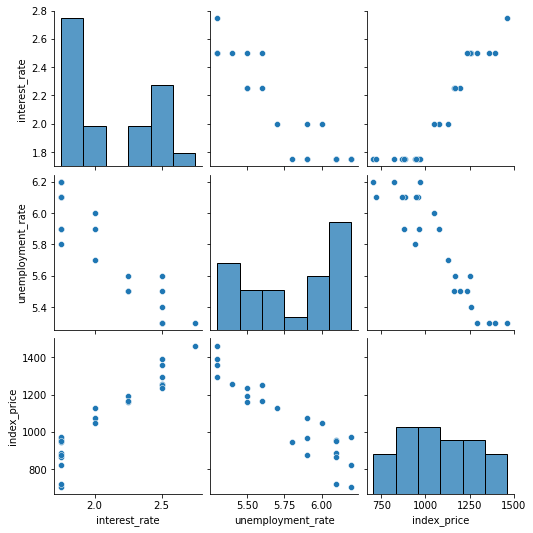

In [9]:
import seaborn as sns
sns.pairplot(df_index)

In [10]:
#correlation
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [11]:
#visualise data points


Text(0, 0.5, 'Unemployment rate')

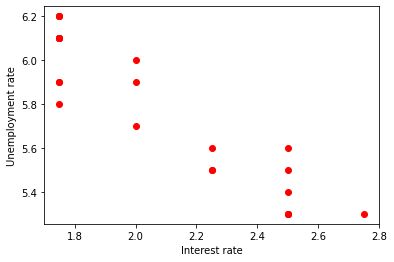

In [13]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [14]:
#independent and dependent feature
X = df_index.iloc[:,:-1] #first two columns (all columns except last)
y = df_index.iloc[:,-1] #last column only

In [15]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [16]:
#train test split
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

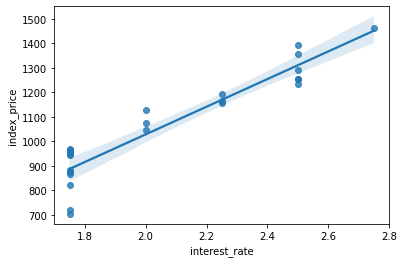

In [20]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)


<AxesSubplot:xlabel='interest_rate', ylabel='unemployment_rate'>

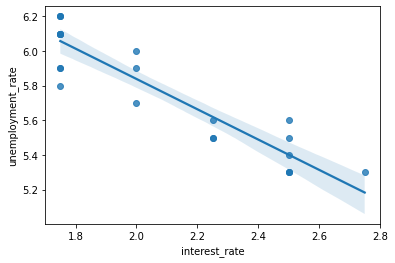

In [22]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

<AxesSubplot:xlabel='unemployment_rate', ylabel='index_price'>

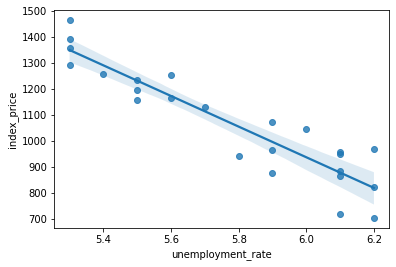

In [23]:
sns.regplot(x='unemployment_rate', y='index_price', data=df_index)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train) #fit_transform converts df to a 2d array

In [29]:
X_test = scaler.fit_transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
regression =LinearRegression()

In [33]:
regression.fit(X_train, y_train)

LinearRegression()

In [34]:
from sklearn.model_selection import cross_val_score

In [38]:
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',cv=3)

In [39]:
validation_score  ###vvimp

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [40]:
np.mean(validation_score)

-5914.828180162389

In [41]:
##predict
y_pred = regression.predict(X_test)

In [42]:
print(y_pred)

[1180.7466813   802.74279699 1379.83457045  838.52599602  973.85313963
 1144.96348227]


In [43]:
##performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

8108.567426306611
73.80444932337099
90.04758423359624


In [45]:
from sklearn.metrics import r2_score

In [46]:
score = r2_score(y_test, y_pred)
print(score)

0.7591371539010254


Assumptions

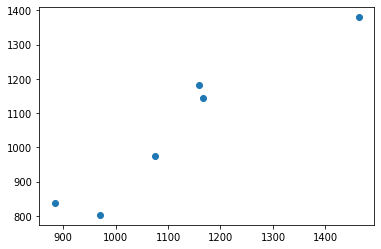

In [47]:
plt.scatter(y_test, y_pred) #if y_test and y_pred follow a linear relation, model performing well

In [48]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


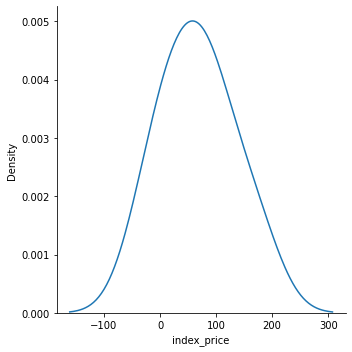

In [49]:
#plot these residuals
sns.displot(residuals, kind='kde')

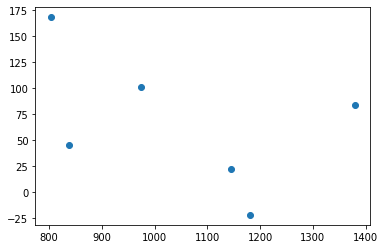

In [50]:
##scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)  #uniform distribution, good model